In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv(r"F:\ineuron\breast cancer\Breast_cancer_data.csv")

In [3]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [7]:
df.shape

(569, 6)

In [7]:
df.diagnosis.unique()

array([0, 1], dtype=int64)

In [8]:
#check for missing values
df.isnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


In [9]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [11]:
#check for duplicates
df.duplicated().sum()

0

In [10]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [11]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [14]:
#removing outliers in mean_area
df.mean_area.quantile(0.999)

2499.864

In [15]:
df.shape

(569, 6)

In [16]:
df= df[df.mean_area<=df.mean_area.quantile(0.999999)]

In [17]:
df.shape

(568, 6)

In [18]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.103889,19.277359,91.801901,651.638908,0.096339,0.628521
std,3.482620,4.294816,23.990829,343.570353,0.014067,0.483626
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.697500,16.170000,75.135000,420.175000,0.086290,0.000000
50%,13.355000,18.835000,86.210000,548.750000,0.095865,1.000000
75%,15.780000,21.785000,103.875000,782.625000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2499.000000,0.163400,1.000000


# AGGREGATION

In [19]:
df.groupby(['diagnosis'])['mean_radius'].mean()

diagnosis
0    17.415640
1    12.146524
Name: mean_radius, dtype: float64

In [20]:
df.groupby(['diagnosis'])['mean_texture'].mean()

diagnosis
0    21.582796
1    17.914762
Name: mean_texture, dtype: float64

In [21]:
 df.groupby(['diagnosis'])['mean_area'].mean()

diagnosis
0    971.160190
1    462.790196
Name: mean_area, dtype: float64

In [22]:
df.groupby(['diagnosis'])['mean_perimeter'].mean()

diagnosis
0    115.026351
1     78.075406
Name: mean_perimeter, dtype: float64

In [23]:
df.groupby(['diagnosis'])['mean_smoothness'].mean()

diagnosis
0    0.102872
1    0.092478
Name: mean_smoothness, dtype: float64

# DATA VISUALIZATION

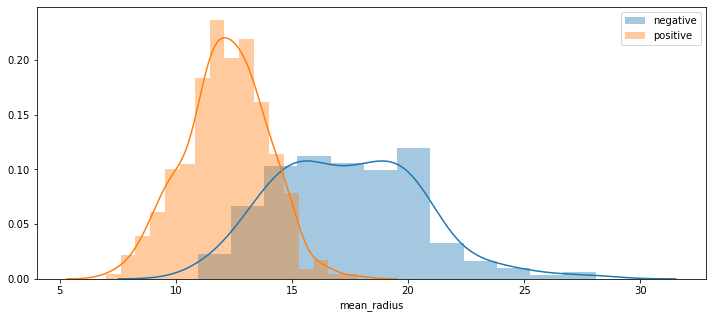

In [24]:
#analytics btw catergorical and numeric
plt.figure(figsize=(12,5))
sns.distplot(df.mean_radius[df.diagnosis==0])
sns.distplot(df.mean_radius[df.diagnosis==1])
plt.legend(['negative','positive'])
plt.show()

At range radius 5 to 15 case is positive

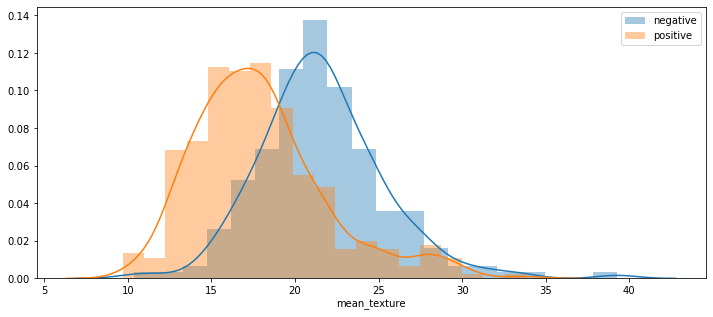

In [25]:
plt.figure(figsize=(12,5))
sns.distplot(df.mean_texture[df.diagnosis==0])
sns.distplot(df.mean_texture[df.diagnosis==1])
plt.legend(['negative','positive'])
plt.show()

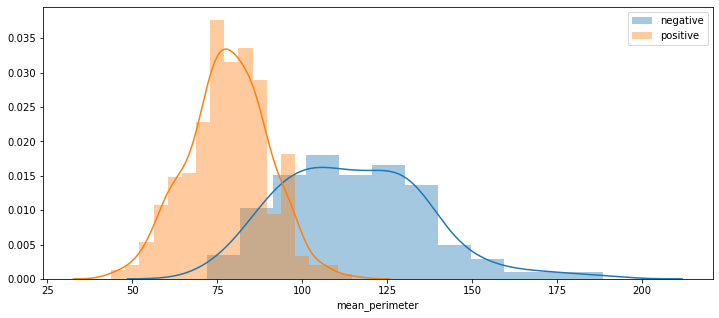

In [26]:
plt.figure(figsize=(12,5))
sns.distplot(df.mean_perimeter[df.diagnosis==0])
sns.distplot(df.mean_perimeter[df.diagnosis==1])
plt.legend(['negative','positive'])
plt.show()

 at range 50 to 100  case is positive

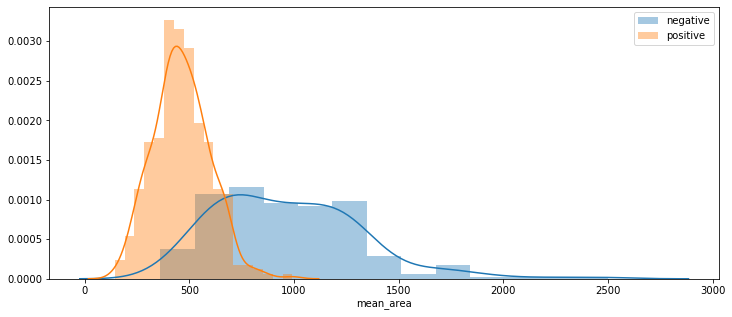

In [27]:
plt.figure(figsize=(12,5))
sns.distplot(df.mean_area[df.diagnosis==0])
sns.distplot(df.mean_area[df.diagnosis==1])
plt.legend(['negative','positive'])
plt.show()

At range 0 to 500 case is postive (mean_area might be a major factor)

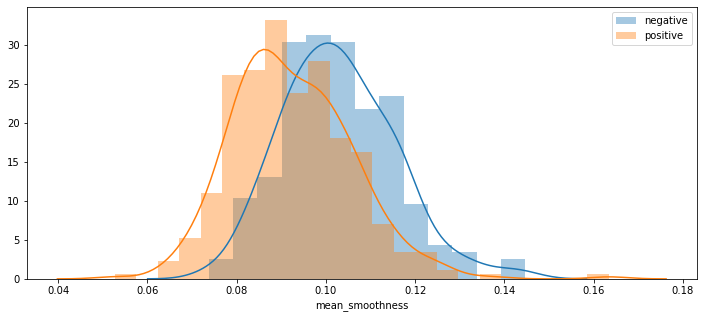

In [28]:
plt.figure(figsize=(12,5))
sns.distplot(df.mean_smoothness[df.diagnosis==0])
sns.distplot(df.mean_smoothness[df.diagnosis==1])
plt.legend(['negative','positive'])
plt.show()

At range of 0.06 to 0.08 is positive but not a effective factor

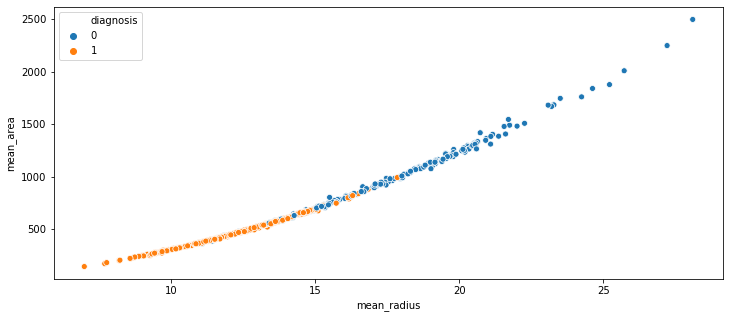

In [29]:
#categorical v/s numerical v/s categorical 
#x ,y, hue>> x= cateogircal,y=numerical,hue= cateogrical
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_radius',y='mean_area',hue='diagnosis',data=df)
plt.show()

 radius and area are major impacting factor
 as radius goes on  increasing and area goes on increasing ,case is becoming positive

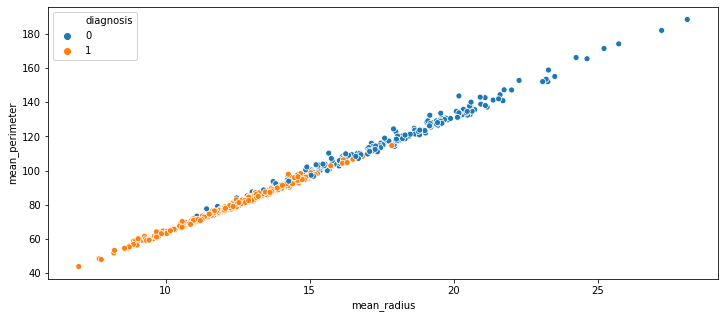

In [30]:
#categorical v/s numerical v/s categorical 
#x ,y, hue>> x= cateogircal,y=numerical,hue= cateogrical
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_radius',y='mean_perimeter',hue='diagnosis',data=df)
plt.show()

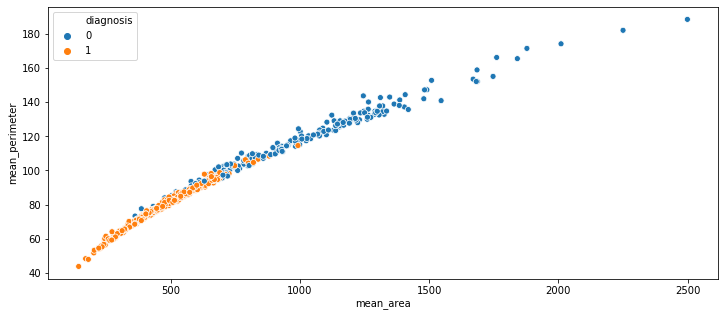

In [31]:
#categorical v/s numerical v/s categorical 
#x ,y, hue>> x= cateogircal,y=numerical,hue= cateogrical
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_area',y='mean_perimeter',hue='diagnosis',data=df)
plt.show()

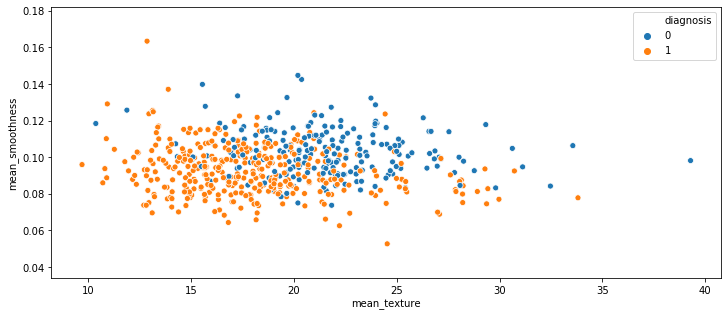

In [32]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_texture',y='mean_smoothness',hue='diagnosis',data=df)
plt.show()

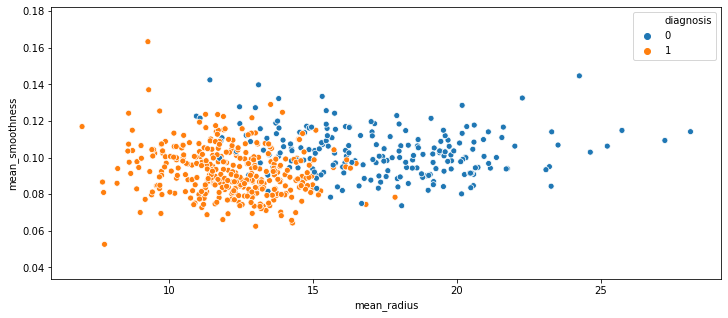

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_radius',y='mean_smoothness',hue='diagnosis',data=df)
plt.show()

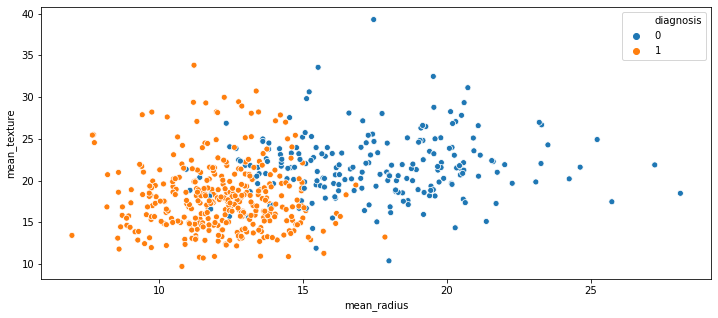

In [34]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='mean_radius',y='mean_texture',hue='diagnosis',data=df)
plt.show()

# Correlation

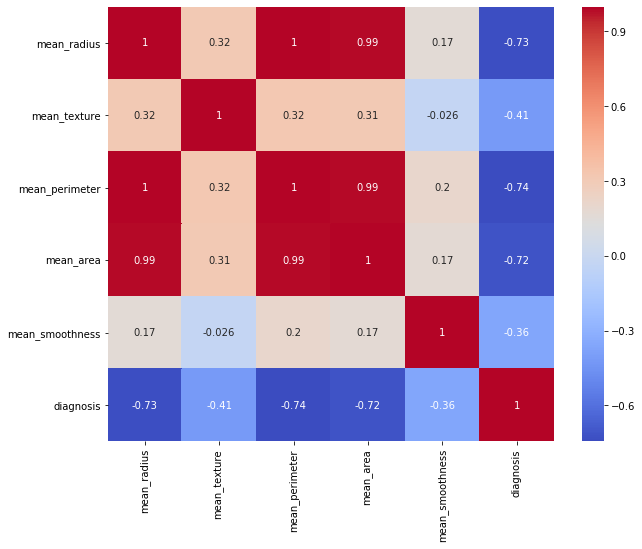

In [35]:
#correlation analysis
cor = df.corr()
#heatmap for visualization correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')#if we will not write annot=True then the values will not show
plt.show()

In [36]:
x=df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']]
y=df["diagnosis"]

# Preprocessing

In [37]:
x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)

In [40]:
#splitting data info train and test set
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2)
print(x.shape)
print(xtr.shape)
print(xts.shape)
print(y.shape)
print(ytr.shape)
print(yts.shape)

(568, 5)
(454, 5)
(114, 5)
(568,)
(454,)
(114,)


# Apply ML algo

# 1.Logistic Regression

This is a classification problem under supervised learning.This is a logistic problem because there are two classes and label is caterogrical

In [41]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [42]:
#train the model -using training data -xtr,ytr
model.fit(xtr,ytr)

LogisticRegression()

# Perfomance Analysis

In [43]:
# radius-16.65,texture-21.38,perimeter-110,area-904.6,smoothness-0.1121
new_case=[[16.65,21.38,110,904.6,0.1121]]
model.predict(new_case)

array([0], dtype=int64)

In [44]:
#here 0 is negative

In [45]:
#accuracy
#check perfomance of model on test data
# getting prediction for test data
ypred = model.predict(xts)
from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.9385964912280702

In [46]:
#calcuate recall
metrics.recall_score(yts,ypred)

0.9459459459459459

# 2.KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 3)#no of neighbors is hpyer parameter
model2.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=3)

In [48]:
#accuracy
ypred2=model2.predict(xts)
metrics.accuracy_score(yts,ypred2)#here it checks for both class 1 and class 0( here 0 and 1  are told as class)

0.956140350877193

In [49]:
#recall
metrics.recall_score(yts,ypred2)#here it ckecks only for class 1

1.0

In [50]:
import pickle

In [51]:
filename='cancer.pkl'

In [52]:
pickle.dump(model2, open(filename, 'wb'))